# The Sparks Foundation Data Science and Business Analytics Internship #GripOct23
## Author: Amr Ayman Essawi
## Task 6: Prediction using Decision Tree Algorithm
## Main Objectives:
1. Perform Data Analysis on iris dataset.
2. Preprocess iris dataset to be ready for training.
3. Train decision tree classifier and apply hyperparameter tuning for classification task.
4. Evaluate the trained model on unseen test data.
5. Visualize the Decision Tree Model.
5. Use the trained model to classify new data.

### Importing Libraries and Dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn import tree
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Getting Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Preprocessing (1)

#### Removing Unusable Columns 'Id'

In [6]:
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analysis (1)

####  Getting Number of unique values in each feature and in Species

In [7]:
for column in df.columns:
    print(column,df[column].value_counts())

SepalLengthCm 5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64
SepalWidthCm 3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64
PetalLengthCm 1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.

As we see all features are numeric, and we have 3 classes in species with equally distributed values in dataset

#### Plotting the Distribution of SepalLengthCm

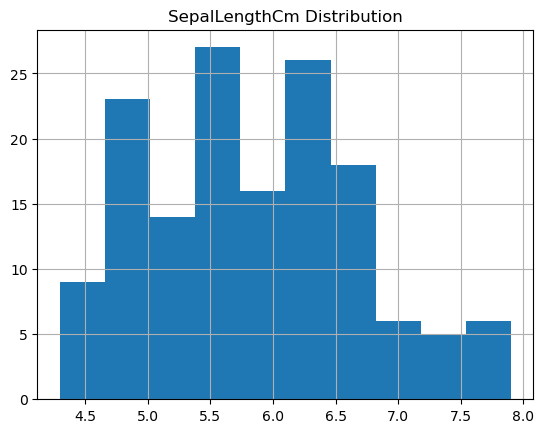

In [8]:
df['SepalLengthCm'].hist()
plt.title('SepalLengthCm Distribution')
plt.show();

#### Plotting the Distribution of SepalWidthCm

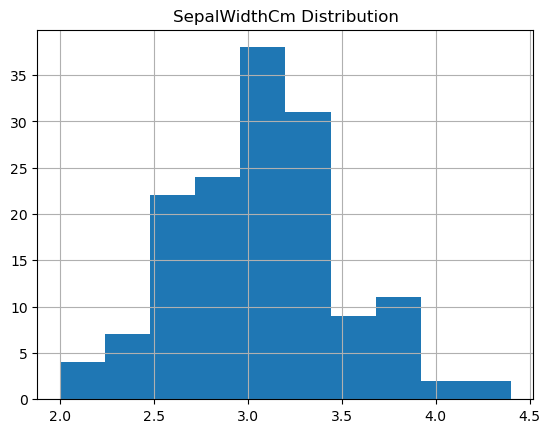

In [9]:
df['SepalWidthCm'].hist()
plt.title('SepalWidthCm Distribution')
plt.show();

#### Plotting the Distribution of PetalLengthCm

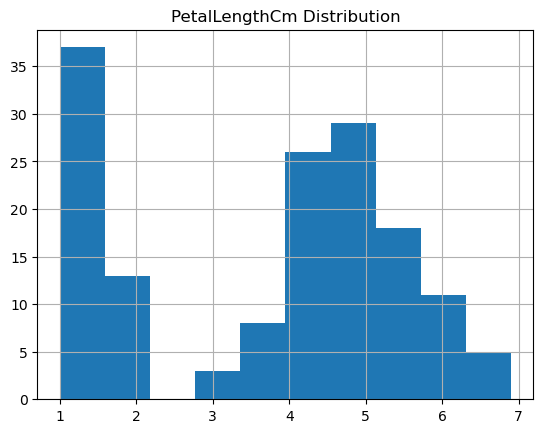

In [10]:
df['PetalLengthCm'].hist()
plt.title('PetalLengthCm Distribution')
plt.show();

Looks like petallengthcm feature divides data into 2 classes

#### Plotting the Distribution of PetalWidthCm

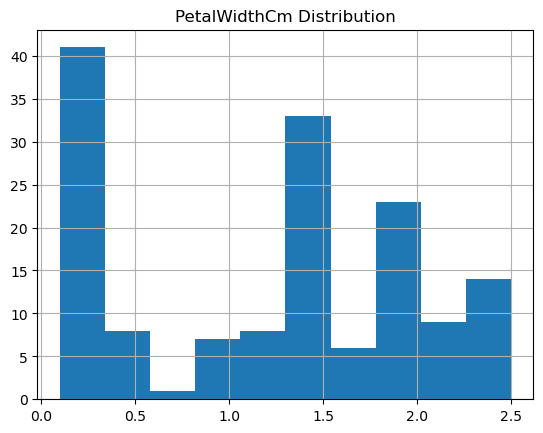

In [11]:
df['PetalWidthCm'].hist()
plt.title('PetalWidthCm Distribution')
plt.show();

Looks like petalwidthcm feature divides data into 2 classes

#### Plotting Scatter Plot of SepalLengthCm and SebalWidthCm with Species classes

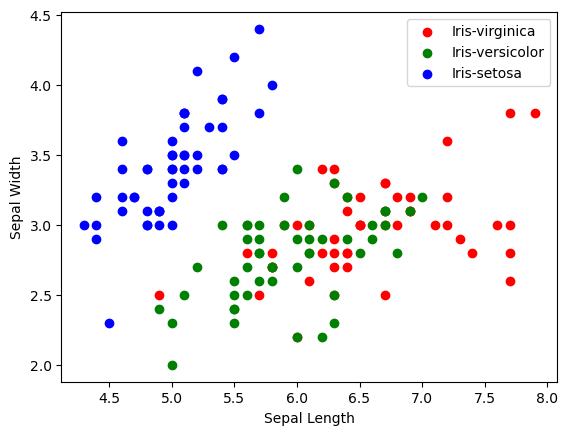

In [12]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show();

We see here that the data is separated to only 2 classes which are the blue (first class),  green&red (second class).

#### Plotting Scatter Plot of PetalLengthCm and PetalWidthCm with Species classes

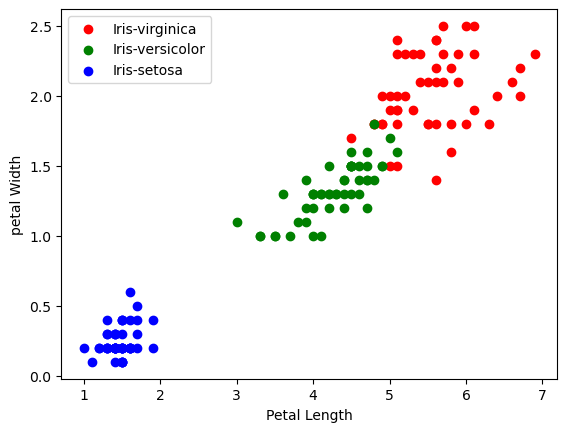

In [13]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('petal Width')
plt.legend()
plt.show();

We see here that data is separated to 2 sharp classes which are blue (first class), green&red (second class) but we can also searate green and red classes with very few overlapping.

#### Plotting Scatter Plot of SepalLengthCm and PetalLengthCm with Species classes

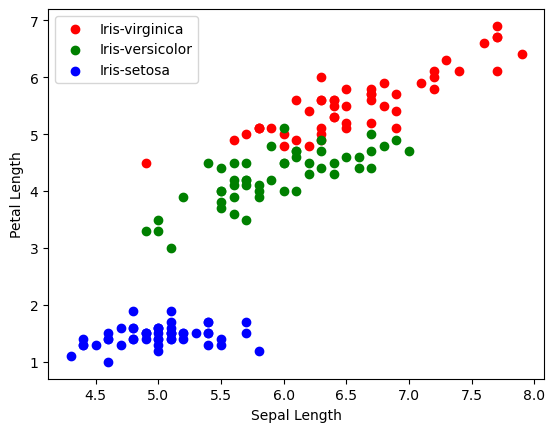

In [14]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show();

We can see that this scatter look like the prevoius one but with more overlapping points between green and red.

#### Plotting Scatter Plot of SepalWidthCm and PetalWidthCm with Species classes

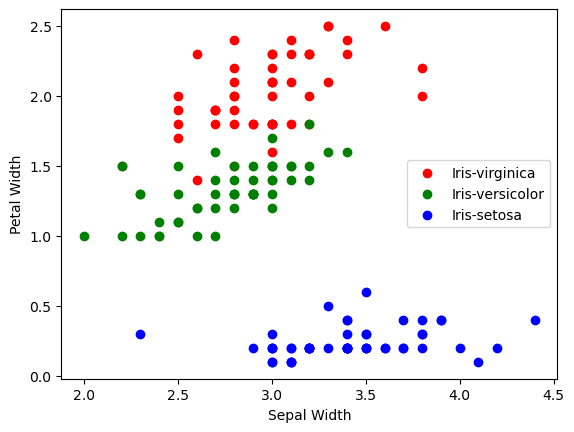

In [15]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show();

#### Plotting Scatter Plot of SepalLengthCm and PetalWidthCm with Species classes

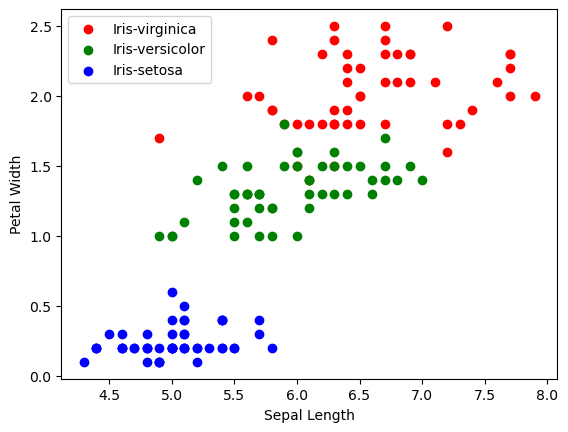

In [16]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show();

#### Plotting Scatter Plot of PetalLengthCm and SepalWidthCm with Species classes

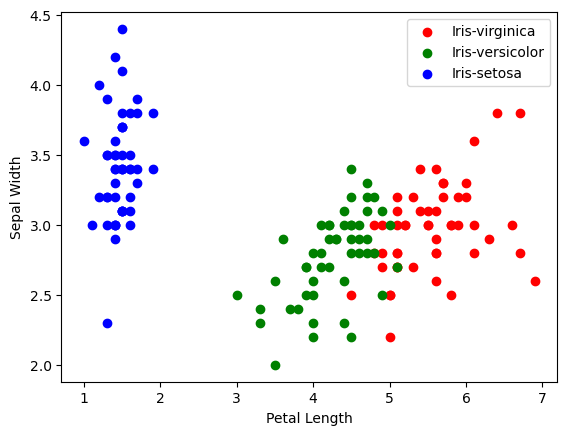

In [17]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show();

From the previous scatter plots we get that the best combinations which separate the data into 3 classes are
1. Petal length and Petal Width
2. Petal width and Sepal Width
3. Sepal Length and Petal Width

### Data Preprocessing (2)

#### Encoding the species to numeric categories

In [18]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Exploratory Data Analysis (2)

#### Viewing Correlation matrix with Species

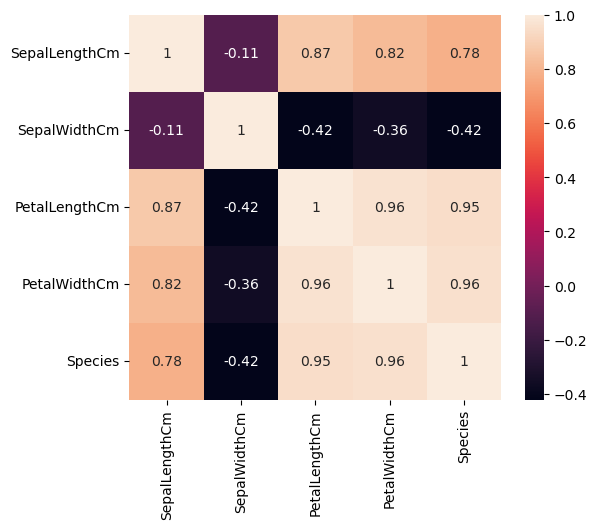

In [19]:
corr = df.corr()
fig, ax = plt.subplots(figsize= (6,5))
sns.heatmap(corr, annot=True, ax=ax)
plt.show();


We can see that Petallength and Petal width are having very high correlation so, we can remove on of them.

#### Plotting Box plot of SepalLengthCm

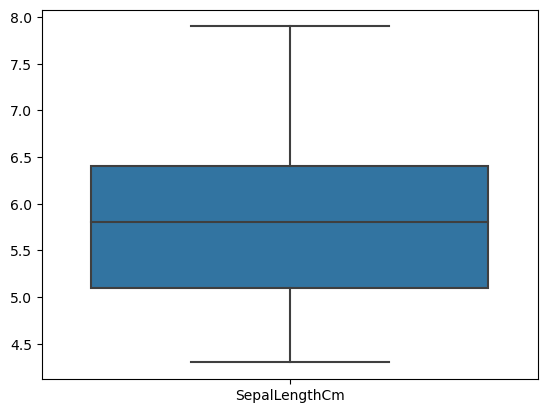

In [20]:
sns.boxplot(data=df[['SepalLengthCm']])
plt.show();

#### Plotting Box plot of SepalWidthCm

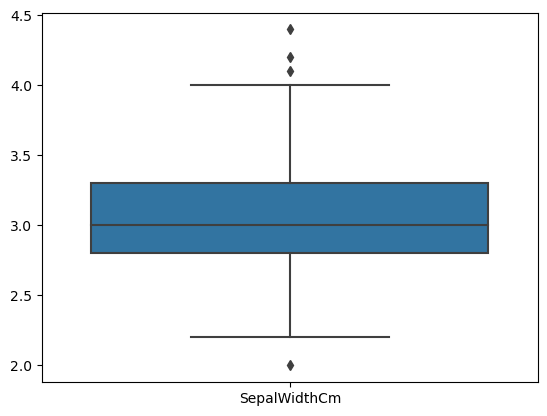

In [21]:
sns.boxplot(data=df[['SepalWidthCm']])
plt.show();

We can see that there are many outliers in SepalWidth Feature

#### Plotting Box plot of PetalLengthCm

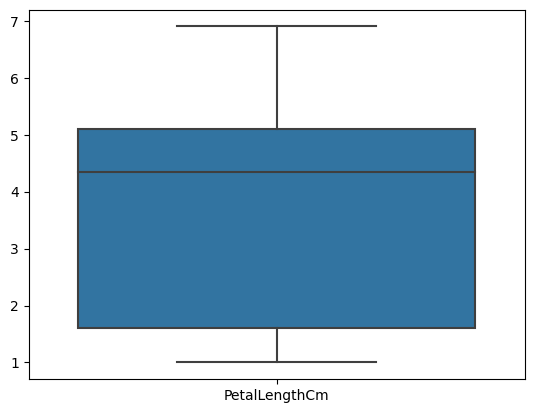

In [22]:
sns.boxplot(data=df[['PetalLengthCm']])
plt.show();

#### Plotting Box plot of PetalWidthCm

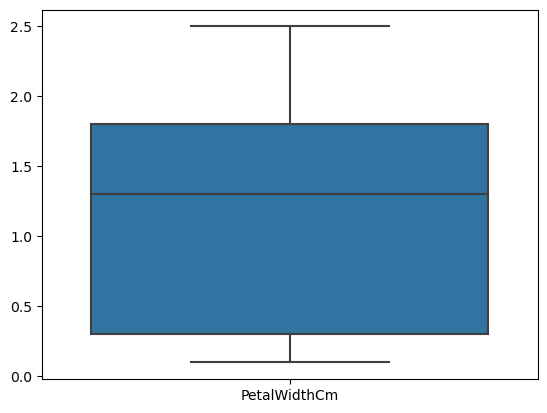

In [23]:
sns.boxplot(data=df[['PetalWidthCm']])
plt.show();

Data Preprocessing optional Steps that can be done to improve model training:
1. Take one of the three combination to be features only 
-- (Petal length and Petal Width)
-- (Petal width and Sepal Width)
-- (Sepal Length and Petal Width).
2. Remove one of this features due to high correlation between them ( Petallength or Petal width).
3. Remove SepalWidthCm feature due to very low correlation with Species.
4. Apply StandardScaling to all Features as they are all numeric.
5. Remove outliers points or change thier values from SepalWidthCm feature.


### Preparing Dataset for Model Training

#### Splitting Dataset into train and test with 80% train & 20% test manually

In [24]:
# Splitting manual to maintain the count of every class in species in train data
class0 = df[df['Species'] == 0]
class1 = df[df['Species'] == 1]
class2 = df[df['Species'] == 2]

# 80% train and 20% test data
train_data = pd.concat([class0.iloc[0:40],class1.iloc[0:40],class2.iloc[0:40]], ignore_index=True)
test_data = pd.concat([class0.iloc[40:],class1.iloc[40:],class2.iloc[40:]], ignore_index=True)

# shuffling the dataset
train_data = train_data.sample(frac=1, random_state=10)
test_data = test_data.sample(frac=1, random_state=10)

# preparing for training
X_train = train_data.drop('Species',axis=1)
y_train = train_data['Species']
X_test = test_data.drop('Species',axis=1)
y_test = test_data['Species']

#### Printing the shape of train and test data

In [25]:
X_train.shape , X_test.shape

((120, 4), (30, 4))

### Model Training

#### Initializing the Model

In [26]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=10)

#### Fitting the Model on Training Data

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

### Model Evaluation

#### Predicting Test Set Results

In [28]:
y_pred = clf.predict(X_test)

#### Show Classification Report

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Show the Test Accuracy

In [30]:
print('Test Accuracy : ',accuracy_score(y_test,y_pred))

Test Accuracy :  1.0


#### Show Train Accuracy

In [31]:
y_pred_train = clf.predict(X_train)
print('Train Accuracy : ',accuracy_score(y_train,y_pred_train))

Train Accuracy :  1.0


### Model Visualization

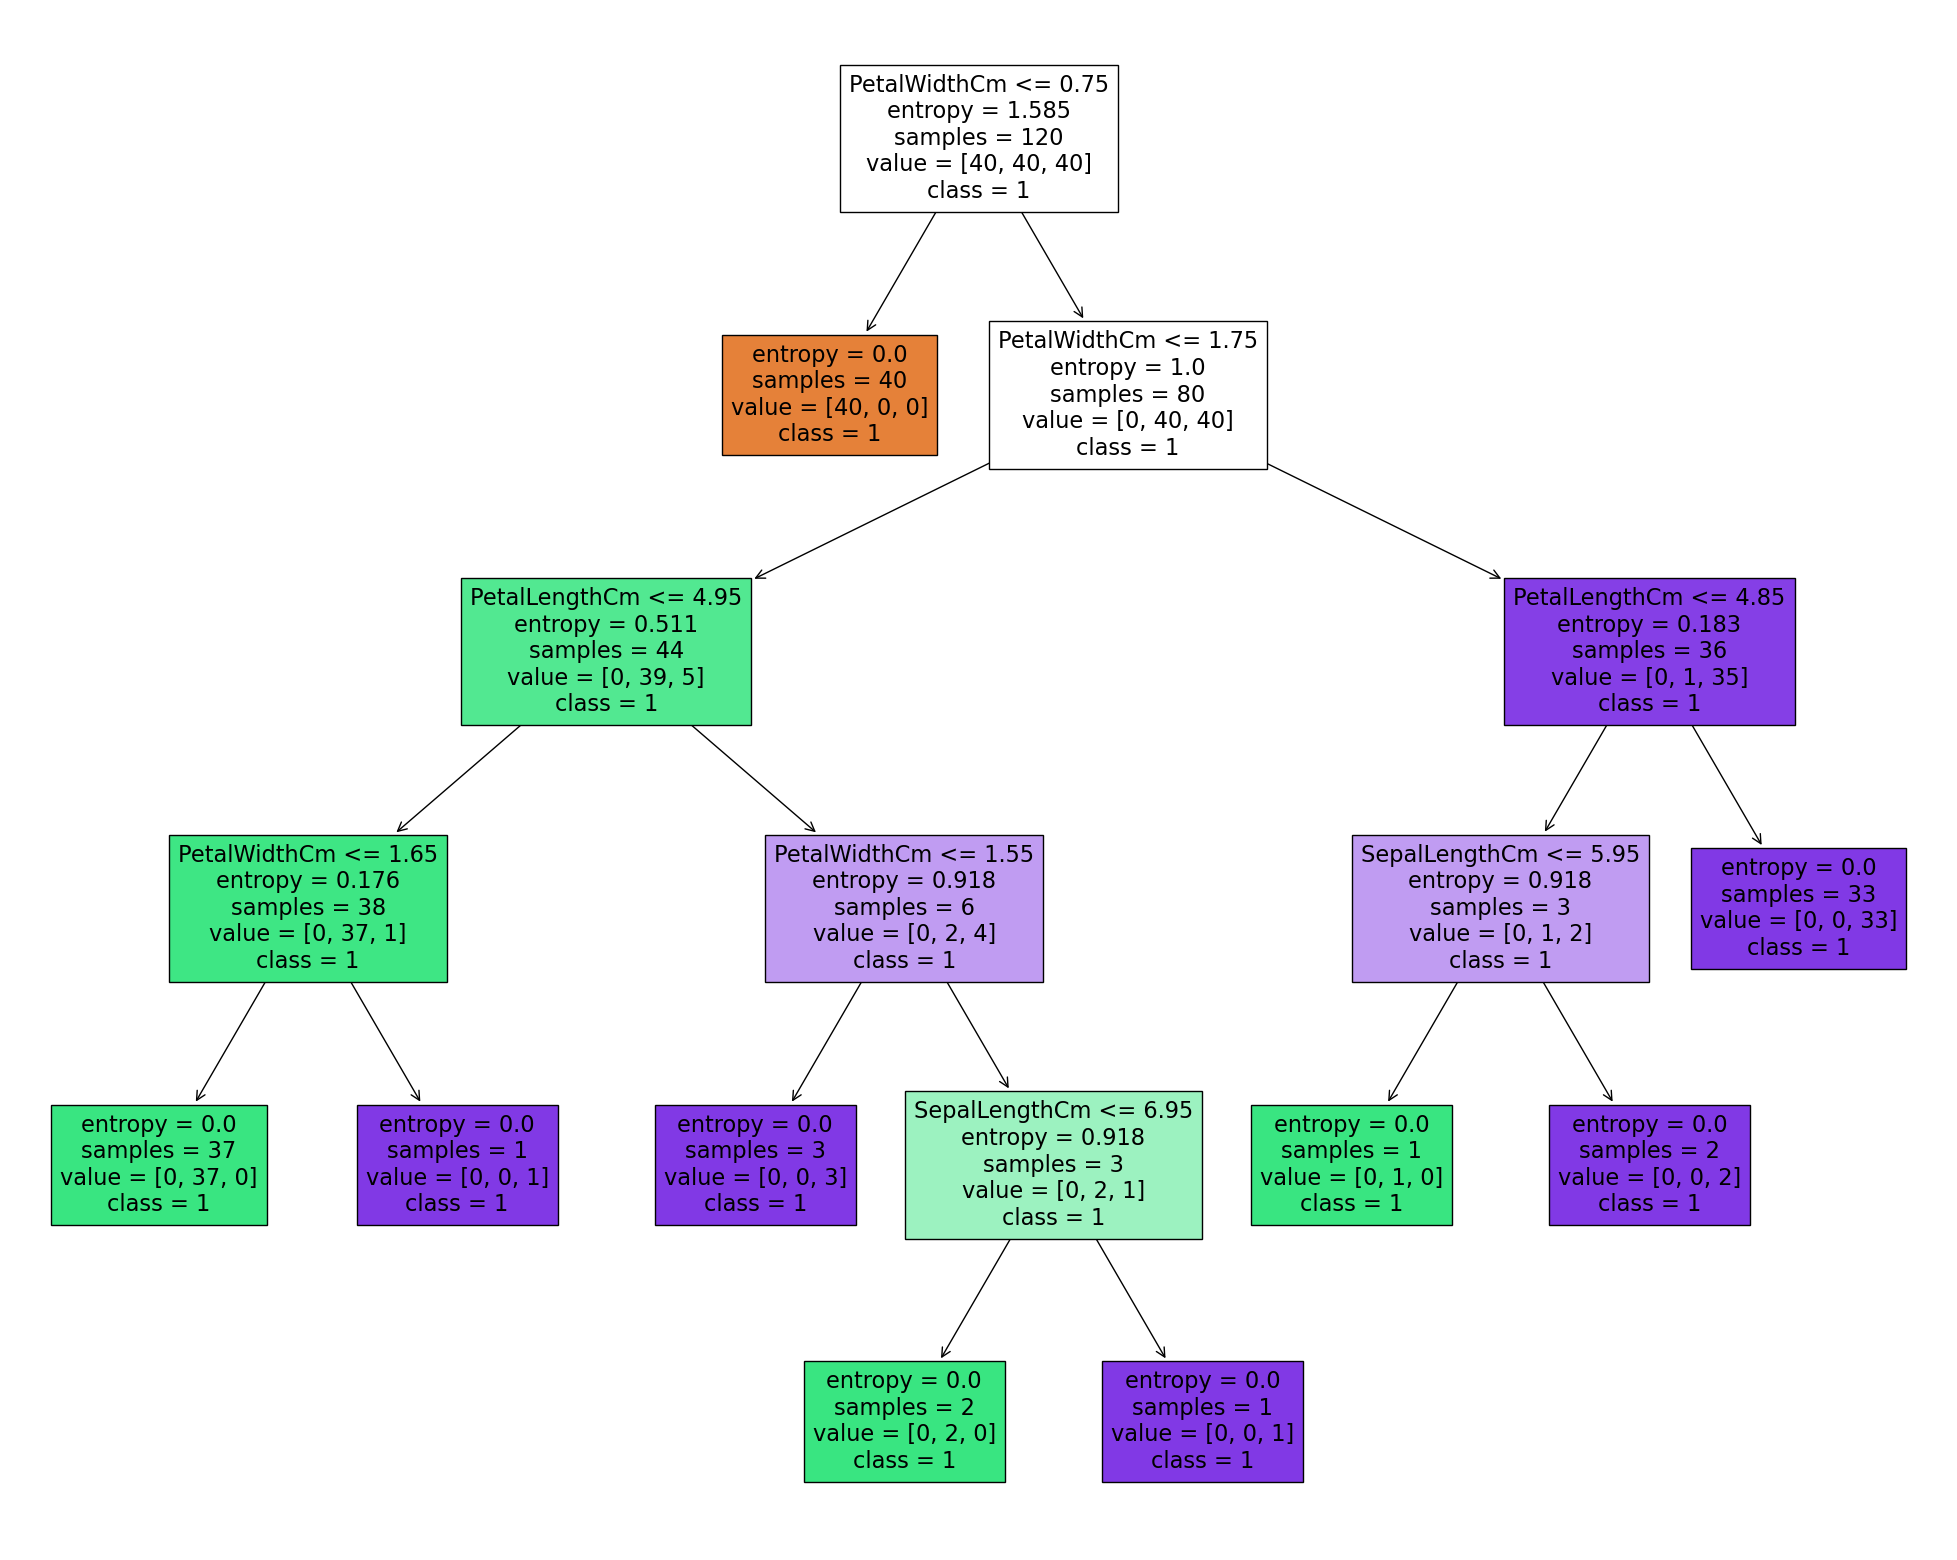

In [32]:
# converting species to string
y_new = []
for i in y_train:
    y_new.append(str(i))
    
# Visualizing Decision Tree Classifier    
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=list(y_new),
                   filled=True)

### Prediction using Trained Model

In [36]:
x_new = pd.DataFrame(columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'])

new_row = {'SepalLengthCm': 3, 'SepalWidthCm': 4, 'PetalLengthCm': 3.5, 'PetalWidthCm': 5}
x_new = x_new.append(new_row, ignore_index=True)

y_out = clf.predict(x_new)
print('Input',x_new)
print('Output',y_out[0])

Input    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            3.0           4.0            3.5           5.0
Output 1


## Summary

After Training with Decision Tree Model and Trying different hyperparameter tuning and data preprocessing
I achieved 100% test accuracy and 100% train accuracy using the standard decision tree classifier with entropy criterion.

The Key which made me reach this accuracy was the splitting od dataset as I maintained the number of instances in each category of species to make the model train on each category equally.